# <center><u>Introduction to data analysis using Python<u></center>
### <center>July 16-17th, 2023</center>
### <center>Eitan Hemed, PhD</center>
### <center>Department of Psychology, University of Haifa</center>

---

<p align="center">
<img src="../logos/_uni.png" width="200" height="200" >
&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp
<img src="../logos/_beit.png" width="200" height="200" >
</p>

In the previous part we got to know the fundamentals of Python. In the rest of the workshop, we'll begin our introduction to data analysis using Python. We'll begin by how data is organized and manipulated, how to plot our data and finally how to run common statistical tests.

# NumPy

NumPy ("Numerical Python") is not part of the standard library, meaning that this is a package that you need to install (specifically on Google Colab, it was already installed for you). However, it  is fundemental to almost all Python packages used for scientific or data-related work (espcially when working with small to medium-sized data). NumPy is used in other packages dedicated to wrangling and organizing data, plotting data, analyzing data and many more (see [here](https://numpy.org/)).

----

Aside from many mathematical functions, NumPy provides a data structure called an array.

NumPy Arrays (called N-Dimensional arrays, or ndarray for short), NumPy arrays are an ordered mutable collections, that are intended for numerical computation. As the name implies they can be of any number of dimensions (1D, 2D, 3D, up to 32D at the moment).

---


<img src="https://www.physicsforums.com/attachments/1614347010838-png.278712/" width="700" class="center" />

[image source](https://www.physicsforums.com/attachments/1614347010838-png.278712/)

To begin using NumPy, we first have to import it. The common alias for importing NumPy is the following:

In [2]:
import numpy as np

Here is a 1-d array:

In [3]:
a = np.array([1, 2, 3, 5 ])
print(a)

[1 2 3 5]


Although our array looks like a plain list. NumPy arrays have many features that makes them more useful than lists in many cases. For example, scaler and vector operations out of the box:

In [7]:
a = np.array([1, 2, 3, 5 ])
print(a + 2,
      a ** a, sep='\n')

[3 4 5 7]
[   1    4   27 3125]


Built-in methods for common operations:

In [ ]:
print(a.mean(), a.std())

You might have heard that Python is a readable language at the expanse of execution speed. However, NumPy is much faster than vanilla Python, sometimes by orders of magnitude.

In [15]:
_array = np.arange(1e5) # An array with all integers between 0 and 100,000 (end-exclusive)
_list = list(range(int(1e5))) # A list with all integers between 0 and 100,000 (end-exclusive)

print("Vanilla Python: ")
%timeit sum(_list)

print("NumPy: ")
%timeit np.sum(_array)

Vanilla Python: 
884 µs ± 89.3 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
NumPy: 
26.3 µs ± 5.24 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


One of the reasons that NumPy is very fast has to do with how memory is allocated for Python objects vs. NumPy arrays. an store only a single type of values in an array. Objects are coerced into a different data type to fit the most 'complex' type.



In [17]:
a = np.full(5, True)
print(a) # all elements are booleans
a[-1] = 0
print(a) # the last element is coerced into a boolean as well

[ True  True  True  True  True]
[ True  True  True  True False]


The same goes for strings.

In [18]:
a = np.linspace(start=-5, stop=5, num=10).round(2) # Get evenly spaced numbers
print(a, a.dtype) # the default type is float
a[3:5] = ['105.3', '7.7']
print(a, a.dtype) # the 4th and 5th elements are coerced into floats.

[-5.   -3.89 -2.78 -1.67 -0.56  0.56  1.67  2.78  3.89  5.  ] float64
[ -5.    -3.89  -2.78 105.3    7.7    0.56   1.67   2.78   3.89   5.  ] float64


#### Shape and indexing.

NumPy arrays can contain be built across multiple dimensions. This allows us to create complex and flexible data structure.

Let's create an array with two dimensions - 3 rows and 4 columns. 

In [28]:
three_by_four = np.ones(shape=(3, 4)) # (y, x)
print(three_by_four,
      "\nThe shape is: ", three_by_four.shape)

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]] 
The shape is:  (3, 4)


One thing you need to get used to is that the first dimension is the rows, and the second is the columns (Y, X). This is the opposite of how we usually think about matrices (X, Y).

Now we can begin selecting the array elements using both dimensions. Indexing of arrays with complex shapes is a breeze. 

Here we select the first and third rows (`0::2`), and all columns except the first (`1:`).

In [12]:
three_by_four[0::2, 1:] = 0
print(three_by_four)

[[1. 0. 0. 0.]
 [1. 1. 1. 1.]
 [1. 0. 0. 0.]]


#### $\color{dodgerblue}{\text{Exercise}}$

We can change the shape of an array using the `reshape` method. First, create an array of the values 1 through 48 using `np.arange`. Then, reshape it into a different shape with 3 or more dimensions.

Note that in order to fit all elements the *product of the size of all axis* must equal the *total number of elements in the array*.

In [52]:
a = np.arange(1, 49)
print(a.shape)

a = a.reshape(3, 4, 4)
print("The new shape is:", a.shape)
print("The product of the dimensions is:", np.product(a.shape))

(48,)
The new shape is: (3, 4, 4)
The product of the dimensions is: 48


#### $\color{dodgerblue}{\text{Exercise}}$

One useful wildcard in reshaping is `-1`. This wildcard tells NumPy to infer the size of the axis from the other axes.

Repeat the exercise above, now reshaping the array into any 3D shape, but use `-1` anywhere in the `reshape` method.

In [53]:
a = np.arange(0, 36)
print("Elements in a:", a.size)

a = a.reshape(-1, 3, 4)
print("The new shape of a is:", a.shape)
print("The product of the dimensions is:", np.product(a.shape))

Elements in a: 36
The new shape of a is: (3, 3, 4)
The product of the dimensions is: 36


One thing to mention regarding arrays shapes, is that they control our ability to work with different arrays. We've seen that we can add or multiply all values of an array in a scaler, or add a similar shaped array to another. But what happens when we try to add two arrays with different shapes?

Numpy requires that shapes will match in the following fashion - either the size of a dimension is 1, or it is the same size as the other array. If the two arrays have different number of dimensions, then NumPy tries to match them beginning from the last dimension and proceeding backwards.

In [25]:
a = np.ones(shape=(3, 4))
b = np.ones(shape=(5, 5, 3, 4))
print(a + b)

[[[[2. 2. 2. 2.]
   [2. 2. 2. 2.]
   [2. 2. 2. 2.]]

  [[2. 2. 2. 2.]
   [2. 2. 2. 2.]
   [2. 2. 2. 2.]]

  [[2. 2. 2. 2.]
   [2. 2. 2. 2.]
   [2. 2. 2. 2.]]

  [[2. 2. 2. 2.]
   [2. 2. 2. 2.]
   [2. 2. 2. 2.]]

  [[2. 2. 2. 2.]
   [2. 2. 2. 2.]
   [2. 2. 2. 2.]]]


 [[[2. 2. 2. 2.]
   [2. 2. 2. 2.]
   [2. 2. 2. 2.]]

  [[2. 2. 2. 2.]
   [2. 2. 2. 2.]
   [2. 2. 2. 2.]]

  [[2. 2. 2. 2.]
   [2. 2. 2. 2.]
   [2. 2. 2. 2.]]

  [[2. 2. 2. 2.]
   [2. 2. 2. 2.]
   [2. 2. 2. 2.]]

  [[2. 2. 2. 2.]
   [2. 2. 2. 2.]
   [2. 2. 2. 2.]]]


 [[[2. 2. 2. 2.]
   [2. 2. 2. 2.]
   [2. 2. 2. 2.]]

  [[2. 2. 2. 2.]
   [2. 2. 2. 2.]
   [2. 2. 2. 2.]]

  [[2. 2. 2. 2.]
   [2. 2. 2. 2.]
   [2. 2. 2. 2.]]

  [[2. 2. 2. 2.]
   [2. 2. 2. 2.]
   [2. 2. 2. 2.]]

  [[2. 2. 2. 2.]
   [2. 2. 2. 2.]
   [2. 2. 2. 2.]]]


 [[[2. 2. 2. 2.]
   [2. 2. 2. 2.]
   [2. 2. 2. 2.]]

  [[2. 2. 2. 2.]
   [2. 2. 2. 2.]
   [2. 2. 2. 2.]]

  [[2. 2. 2. 2.]
   [2. 2. 2. 2.]
   [2. 2. 2. 2.]]

  [[2. 2. 2. 2.]
   [2. 2. 2. 2.]
   [2.

ValueError: operands could not be broadcast together with shapes (5,5,3,4) (3,4,5) 

If the shapes of the two arrays do not match, consider reshaping them to match. If that's not possible due to the number of elements you could possibly pad the arrays with some values to make them match. If you happen to work with images, you will see that this is a common practice.

### Boolean Indexing

Another thing we will touch upon regarding NumPy array is Boolean Indexing. In boolean indexing we are using truth values to index an array. When NumPy arrays are checked for their truth values they (usually) return the value for each element. This is not especially complicated but it is a crucial topic when working with data frames, covered later. 


In [60]:
x = np.array([-1, -15, 17, -7, 256]) # Use a list to create an array
boolean_indices_of_positive_values_in_x = x > -1
print("Positive values:", boolean_indices_of_positive_values_in_x)
print(x[boolean_indices_of_positive_values_in_x])

Positive values: [False False  True False  True]
[ 17 256]


#### $\color{dodgerblue}{\text{Exercise}}$

Create an array of 10 numbers, and use `np.where` to find the *indices* of the positive values in the array.

In [62]:
a = np.arange(-5, 5)
print(np.where(a > 0))

(array([6, 7, 8, 9], dtype=int64),)


#### $\color{dodgerblue}{\text{Exercise}}$

Create a 5 (rows) by 7 (columns) array of random numbers. Here we use the NumPy `random` module, to create an array from a uniform distribution.

In [84]:
np.random.seed(42) # So we would get the same numbers on each run. 
five_by_seven = np.random.random_sample(size=(5, 7))
print(five_by_seven)

[[0.37454012 0.95071431 0.73199394 0.59865848 0.15601864 0.15599452
  0.05808361]
 [0.86617615 0.60111501 0.70807258 0.02058449 0.96990985 0.83244264
  0.21233911]
 [0.18182497 0.18340451 0.30424224 0.52475643 0.43194502 0.29122914
  0.61185289]
 [0.13949386 0.29214465 0.36636184 0.45606998 0.78517596 0.19967378
  0.51423444]
 [0.59241457 0.04645041 0.60754485 0.17052412 0.06505159 0.94888554
  0.96563203]]


Multiply the array by 100 and round the values to 2 decimal points.

In [85]:
five_by_seven = (five_by_seven * 100).round(2) # or use np.round(a, d)
print(five_by_seven)

[[37.45 95.07 73.2  59.87 15.6  15.6   5.81]
 [86.62 60.11 70.81  2.06 96.99 83.24 21.23]
 [18.18 18.34 30.42 52.48 43.19 29.12 61.19]
 [13.95 29.21 36.64 45.61 78.52 19.97 51.42]
 [59.24  4.65 60.75 17.05  6.51 94.89 96.56]]


Select all rows and the first 3 columns.

In [132]:
print(five_by_seven[:, :3])

[[37.45     95.07     73.2     ]
 [86.62     60.11     70.81    ]
 [18.18     18.34     30.42    ]
 [13.95     29.21     36.64    ]
 [44.365625  4.65     60.75    ]]


Aggregate the array by taking the maximum value along all rows (axis 0), in order to get the maximum value on each column (axis 1). How many values should you expect to get?

In [81]:
print(five_by_seven.max(axis=0))

[86.62 95.07 73.2  59.87 96.99 94.89 96.56]


Aggregate the array by finding the median value of each row. How many values should you expect to get?

In [86]:
# Display vals min along rows (aggregating on columns)
print(np.median(five_by_seven, axis=1))

[37.45 70.81 30.42 36.64 59.24]


#### $\color{dodgerblue}{\text{Exercise}}$

Using the `five_by_seven` array, find the indices of the values that are greater than 50.


In [87]:
five_by_seven[five_by_seven > 50]

array([95.07, 73.2 , 59.87, 86.62, 60.11, 70.81, 96.99, 83.24, 52.48,
       61.19, 78.52, 51.42, 59.24, 60.75, 94.89, 96.56])

#### $\color{dodgerblue}{\text{Exercise}}$
Using the `five_by_seven` array, find the indices of the values that are greater than 50, and less than 70.

In [88]:
five_by_seven[(five_by_seven > 50) & (five_by_seven < 70)]

array([59.87, 60.11, 52.48, 61.19, 51.42, 59.24, 60.75])

#### $\color{dodgerblue}{\text{Exercise}}$
Now, find the indices of the values that are greater than 50, and less than 70.

In [0]:
indices_of_target_values_on_all_columns = np.argwhere((five_by_seven > 50) & (five_by_seven < 70))

#### $\color{dodgerblue}{\text{Exercise}}$
Continue by selecting only the values that are on the first and last columns, but do not exclude any rows.

In [125]:
target_values_on_relevant_columns = np.isin(indices_of_target_values_on_all_columns[..., 1], [..., 6])

In [126]:
# Now use the (row, column) indices to change the values to np.nan
indices_of_target_values_to_modify = indices_of_target_values_on_all_columns[target_values_on_relevant_columns]
five_by_seven[indices_of_target_values_to_modify[:, 0],
    indices_of_target_values_to_modify[:, 1]] = np.nan

In [127]:
five_by_seven

array([[37.45    , 95.07    , 73.2     , 59.87    , 15.6     , 15.6     ,
         5.81    ],
       [86.62    , 60.11    , 70.81    ,  2.06    , 96.99    , 83.24    ,
        21.23    ],
       [18.18    , 18.34    , 30.42    , 52.48    , 43.19    , 29.12    ,
              nan],
       [13.95    , 29.21    , 36.64    , 45.61    , 78.52    , 19.97    ,
              nan],
       [44.365625,  4.65    , 60.75    , 17.05    ,  6.51    , 94.89    ,
        96.56    ]])

`np.nan` is a special value that represents "Not a Number". It is used to represent missing values in NumPy arrays. If you want NumPy to ignore `np.nan` values, you can use predefined functions that do so, such as `np.nanmax`, `np.nanmin`, `np.nanmean` etc. If you do not use these functions, you will get `np.nan` as a result.

In [128]:
(np.max(five_by_seven), np.nanmax(five_by_seven))

(nan, 96.99)

You can also use `np.isnan` to find the indices of the `np.nan` values, and exclude them, or replace them with a different value.

#### $\color{dodgerblue}{\text{Exercise}}$
Use `np.isnan` to find the indices of the `np.nan` values, and replace them with the mean value of the array.

In [130]:
five_by_seven[np.isnan(five_by_seven)] = np.nanmean(five_by_seven)

Print the proportion of NaN values in the array, using `np.isnan`:

In [131]:
np.isnan(five_by_seven).mean()

array([[37.45    , 95.07    , 73.2     , 59.87    , 15.6     , 15.6     ,
         5.81    ],
       [86.62    , 60.11    , 70.81    ,  2.06    , 96.99    , 83.24    ,
        21.23    ],
       [18.18    , 18.34    , 30.42    , 52.48    , 43.19    , 29.12    ,
        44.365625],
       [13.95    , 29.21    , 36.64    , 45.61    , 78.52    , 19.97    ,
        44.365625],
       [44.365625,  4.65    , 60.75    , 17.05    ,  6.51    , 94.89    ,
        96.56    ]])

NumPy contains many more functionalities than what we covered here. However, if you have a good grasp on the basics of working with arrays (broadcasting, shapes, boolean indexing, etc.), you should be able to begin utilizing NumPy in your work, as we'll see in the next sections.

# Matplotlib

Matplotlib is the major library for scientific plotting in Python, that serves as backend to more high-level plotting libraries (one of them we'll use later). 
Naturally (and espcially if you ever used MatLab), you would want to use matplotlib like it is used below. However, Matplotlib offers a much more flexible way to draw plots, which we'll learn on this tutorial.

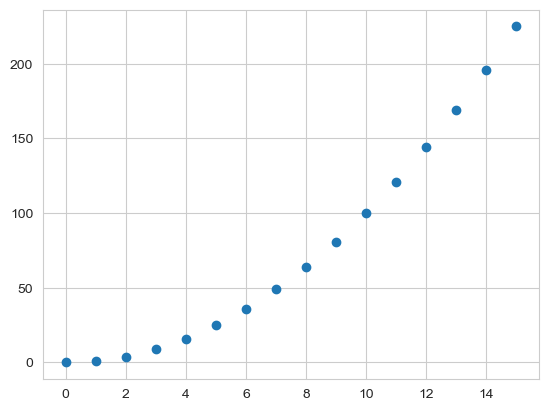

In [134]:
import matplotlib.pyplot as plt
import numpy as np

a = np.arange(0, 16)
b = np.power(a, 2)

plt.scatter(a, b)

The recommended way to use Matplotlib is by interacting with objects. This can give you fine-grained control, and better code modularity.

A figure is similar to an image - a collection of (usually) one or more axes. Axes are what you would usually call plots - a painted region with some associated data. Axes contain the plots we would draw - lineplots, scatterplots, boxplots etc.

---

<img src="https://matplotlib.org/stable/_images/sphx_glr_anatomy_001_2_00x.png" alt="drawing" width="600"/>

[image source](https://matplotlib.org/stable/gallery/showcase/anatomy.html)


This is the common idiom for creating an axes.

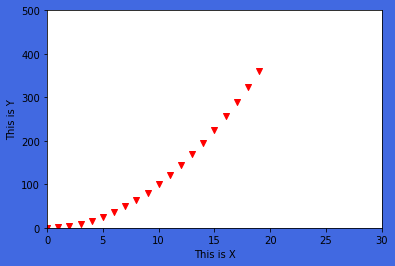

In [ ]:
fig, ax = plt.subplots()

# We can change the figure parameters
fig.set_facecolor('royalblue')

# We can change the ax parameters
ax.set(xlabel='This is X', ylabel='This is Y', xlim=[0, 30],
       ylim=[0, 500])

# We can draw objects into ax, controlling the drawing specs
ax.scatter(a, b, c='red', marker='v')

# And save the figure to a file
fig.savefig('myplot.jpg', quality=100)

#### Multiple axes

However, the real flexibility of this idiom is revealed when we want to plot over more than one axes.

<class 'numpy.ndarray'>
(2, 3)


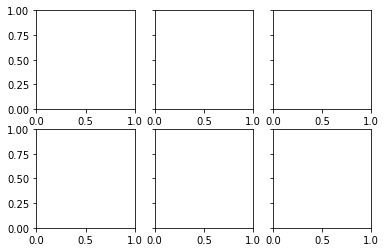

In [ ]:
# axs, as we are creating more than one
fig, axs = plt.subplots(nrows=2, ncols=3, sharey=True) 

print(type(axs))
print(axs.shape)

`axs` is actually a 2D NumPy array - rows (0) and columns (1).

#### $\color{dodgerblue}{\text{Exercise}}$

Create a figure with a 3 X 3 array of axes. Plot some random data on the middle axes in the lower row.

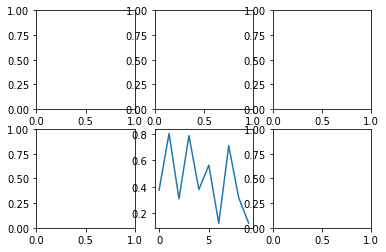

In [ ]:
fig, axs = plt.subplots(2, 3)

a = np.random.random_sample((10, ))

axs[1, 1].plot(a)

Often times, we want to plot different groups on different plots. The main idiom to do it is using a `for` loop with `zip`. 

```
for group_data, ax in zip(all_data, axs):
    ax.hist(group_data)
```

#### $\color{dodgerblue}{\text{Exercise}}$

We will simulate a small dataset, of four groups, with 20 samples each.
Next we will plot a histogram of the data on four different axes, each with a different title for each group.

This exercise requires some manual work and googling to find the right functions. Usually, you can find the right function by googling. For example, if you want to plot a histogram, you can google "matplotlib histogram", and you will find the right function.

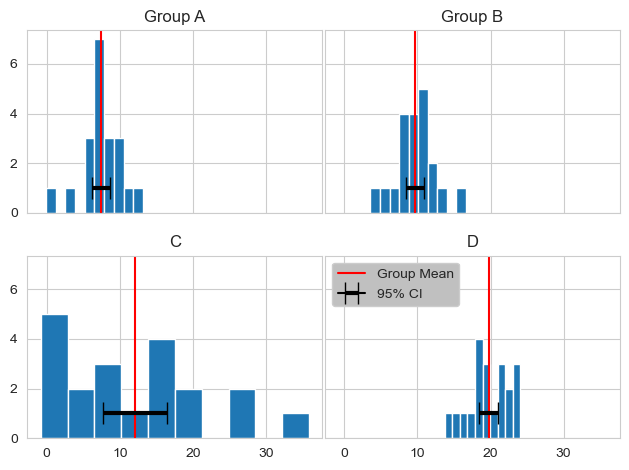

In [140]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import sem

np.random.seed(99)

# Creating a figure with 2 X 2 axes, with shared x and y axes, to ensure the range of values on each plot is the same.
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True)

# Create a dictionary with the data for each group. Fill the Mean and std values for each group.
data = {
    'Group A': np.random.normal(loc=7, scale=3, size=20),
    'Group B': np.random.normal(loc=10, scale=3, size=20),
    'C': np.random.normal(loc=10, scale=9, size=20),
    'D': np.random.normal(loc=20, scale=3, size=20),
}


# `flat` Returns a flattened array (1D, so we can zip it with the matching keys)
for group_name, ax in zip(data, axs.flat): 
    
    # Create a histogram of the values
    ax.hist(data[group_name])
    
    # Mark the mean of the dataset.
    ax.axvline(data[group_name].mean(), c='red', label='Group Mean')

    # Calculate standard error of the mean and turn into 95%-CI  
    ax.errorbar(x=data[group_name].mean(), 
                y=1,
                xerr=1.96 * sem(data[group_name]),
                c='black', capsize=8, elinewidth=3,
                label='95% CI'
                )

    ax.set_title(group_name)

# Add a legend only to the last ax.
ax.legend(facecolor='silver', framealpha=1)

# Removes empty "width" space, makes axes wider (`h_pad` for "height")
fig.tight_layout(w_pad=0.2) 

Matplotlib has many other features and plots, we merely scratched the surface. However, unless you want super-customized plots, you can usually find a solution online and copy-paste it to your code.

Here is the matplotlib [gallery of examples](https://matplotlib.org/stable/gallery/index.html), [tutorials for specific tasks](https://matplotlib.org/stable/tutorials/index.html), and a quick [styles sheet](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html), in case you want more aesthetically pleasing plots.

Some of the work we did in this section was manual and can be skipped using higher-level tools (espcially one we will cover at a later point), however it is crucial to understand the basics of matplotlib so you can take control over your plotting.

It should be mentioned that for specific tasks and fields, there are often specialized tools. To name a few:
* For big data, there is [Datashader](https://datashader.org/), [Holoviews](https://holoviews.org/) and [Plotly](https://plotly.com/python/).
* For statistical plots, there is [Seaborn](https://seaborn.pydata.org/), which is built on top of matplotlib.

# Pandas

pandas ('panel-data') is the main library for working with tabular data in Python on small data sets (as a rule of thumb, less than 1GB).

Before learning how to read data into Pandas, or exporting it out of Pandas, we will get to know the main data structures in Pandas.

One note about Pandas is that there is usually more than one way to do things. Depending on the context some way might be better fit than others.

----

The main object you will work with in Pandas is a dataframe (`pd.DataFrame`).
A dataframe is basically a table, but it offers much more than just a 2D matrix of values.

<img src="https://media.geeksforgeeks.org/wp-content/cdn-uploads/creating_dataframe1.png" width="800" />


([source](https://media.geeksforgeeks.org/wp-content/cdn-uploads/creating_dataframe1.png))



## pandas.Series

A dataframe is composed of columns, each series is 1-D nd-array, with axis labels. We can create a series from a list of an array of values.

In [145]:
import pandas as pd

student_grades = pd.Series(
    data=np.random.normal(90, 1.5, size=5), 
    index=list('ABCDE'), name='student_grades'
)
print(student_grades)

A    88.497634
B    89.148733
C    89.661513
D    91.407036
E    91.255176
Name: student_grades, dtype: float64


Under the hood, a Series is a numpy array, with an index. We can access the values and the index separately.

In [148]:
print(
    type(student_grades),
    type(student_grades.values), sep='\n'
    )


<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


In [151]:
print(student_grades.index, type(student_grades.index), sep='\n')

Index(['A', 'B', 'C', 'D', 'E'], dtype='object')
<class 'pandas.core.indexes.base.Index'>


#### $\color{dodgerblue}{\text{Exercise}}$

Create a series of floats, then access the first value and turn it into a string. Then print the series to see the change. Next, print the type of each value in the series.

In [159]:
s = pd.Series([4., 8.0, 15.0, 16.0, 23.0, 42.0])
print(s)

0     4.0
1     8.0
2    15.0
3    16.0
4    23.0
5    42.0
dtype: float64


In [162]:
s[0] = "Some float"
print(s)

0    Some float
1           8.0
2          15.0
3          16.0
4          23.0
5          42.0
dtype: object


Note that the dtype of the series has changed to `object`, which is the most general type in Python.

Use the `Series.apply` method to apply a function to each value in the series, and reveal its type.

In [163]:
s.apply(type)

0      <class 'str'>
1    <class 'float'>
2    <class 'float'>
3    <class 'float'>
4    <class 'float'>
5    <class 'float'>
dtype: object

When Pandas encounters a Series with mixed data types, it will use the most general type to represent the series, which is `object`.
However, it is not recommended to mix data types in a Series, as it can cause unexpected behavior and slows down computations.

#### $\color{dodgerblue}{\text{Exercise}}$

To reverse this change, we will find the index of the value we changed, and use it to replace the value with a float.

In [164]:
s[s.apply(type) == str] = 4.0
print(s)

0     4.0
1     8.0
2    15.0
3    16.0
4    23.0
5    42.0
dtype: object


It seems that the dtype of the series is still `object`. Use the `Series.astype` method to change the dtype of the series to `float`.

In [166]:
s = s.astype(float)
print(s)

0     4.0
1     8.0
2    15.0
3    16.0
4    23.0
5    42.0
dtype: float64


## pandas.DataFrame

A data frame is a collection of series objects, known as columns. Dataframes are potentially heterogeneous, unlike arrays, as each column can have its own data type(s).

----

We will now create a dataframe, but we will not give it any special column names (label-based identifier for columns - axis 1) or row names (index - label based
identifier for rows - axis 0). 

In [33]:
# Create 5 columns of 20 values each, sampled from a random distribution
import numpy as np
import pandas as pd
random_numbers_df = pd.DataFrame(
    data=np.random.normal(size=(3, 5)))

In [34]:
# Add a 6th column that contains random strings
random_numbers_df[5] = np.random.choice(['dog', 'cat', 'bear', 'bird'],
                                     size=random_numbers_df.shape[0])

print(random_numbers_df,
      random_numbers_df.columns,
      random_numbers_df.index, sep='\n\n')



          0         1         2         3         4     5
0 -0.467499 -0.956639 -1.473531  0.148628  0.513023  bear
1 -0.245679 -0.516772 -1.727650 -1.735082  1.633063   dog
2 -1.806069  1.156379  2.054037 -0.933778 -0.771828  bear

RangeIndex(start=0, stop=6, step=1)

RangeIndex(start=0, stop=3, step=1)


We can get some information on our dataframe using `df.info` e.g., the numebr of null values on each column, their names and data types.

In [170]:
random_numbers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       3 non-null      float64
 1   1       3 non-null      float64
 2   2       3 non-null      float64
 3   3       3 non-null      float64
 4   4       3 non-null      float64
 5   5       3 non-null      object 
dtypes: float64(5), object(1)
memory usage: 272.0+ bytes


#### $\color{dodgerblue}{\text{Exercise}}$
Referring to columns using an integer index doesn't add much over arrays. This is way we can use column names.

Change the name of the dataframe columns using multiple ways. Print the new column names after each change to see what happened.
*   First using assignment on creation.
*   Second, update the column names by using the `pd.DataFrame.rename` method (e.g., change names, capitalization, etc.).


In [36]:
column_names = ['Course', 'Term', 'Average', 'Year']

data_by_terms = [
          ('Python 101', 'Fall', 95, 2021),
          ('Python 101', 'Spring', 85, 2020),
          ('Python 101', 'Fall', 90, 2019),
          ('Python 102', 'Fall', 95, 2021),
          ('Python 102', 'Summer', 100, 2020),
          ('Python 102', 'Fall', 90, 2019),
    ]


course_grades = pd.DataFrame(
    data=data_by_terms, columns=column_names)

print(course_grades)

       Course    Term  Average  Year
0  Python 101    Fall       95  2021
1  Python 101  Spring       85  2020
2  Python 101    Fall       90  2019
3  Python 102    Fall       95  2021
4  Python 102  Summer      100  2020
5  Python 102    Fall       90  2019


#### $\color{dodgerblue}{\text{Exercise}}$
The columns on the dataframe are not renamed after running this cell. Can you explain why?

In [37]:
rename_columns_dict = dict(zip(course_grades.columns,
             ['Course Name', 'Semester', 'Mean Grade', 'Date']))

course_grades.rename(rename_columns_dict, axis=1) # can be replaced with course_grades.rename(columns=rename_columns_dict)

print(course_grades)


       Course    Term  Average  Year
0  Python 101    Fall       95  2021
1  Python 101  Spring       85  2020
2  Python 101    Fall       90  2019
3  Python 102    Fall       95  2021
4  Python 102  Summer      100  2020
5  Python 102    Fall       90  2019


The crux of the previous exercise was that in Pandas, you have to be aware what are the effects of your actions.

Many of the functions return a copy of the dataframe with the additional change from the function call, rather than change it in place by default. You can always reassing the result of the function call to the original variable, or use `inplace=True` when calling a method like `rename`. This is a matter of choice, but there are [debates](https://github.com/pandas-dev/pandas/issues/16529) for and against it.

### Selection

In pandas you can select columns, rows or both in multiple ways.

To demonstrate and practice it we will load an example dataset from a library that we'll get to know later.
The dataset is called `mpg` and contains information about cars, such as their fuel consumption, number of cylinders, etc. It can be used to show the different selection methods, as it contains both numeric and string columns.

In [38]:
import seaborn as sns

mpg = sns.load_dataset('mpg')

print(mpg.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
None


In [39]:
mpg.head(5) # prints the first 5 rows,

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [40]:
mpg.describe() # prints some statistics on the numeric columns

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000



#### Integer-location based indexing

Our first method of selecting data is using the `df.iloc` method.

`iloc` stands for integer-location. We know that a dataframe is in some sense a collection of NumPy arrays, and we know how to index 2-D arrays. So we know how to use iloc.

In [43]:
mpg.iloc[0, -1] # This returns the first row, last column

'chevrolet chevelle malibu'


#### $\color{dodgerblue}{\text{Exercise}}$

Fill the code below to select every third row (axis=0), beginning with the third one, and every other column (axis=1) in the dataframe.

In [0]:
mpg.iloc[2::3, ::2]

You can also use booleans with `iloc` to select rows or columns, or mix them with integers for different axis. This is useful when you want to select rows or columns based on a condition.

In [27]:
# #  6th row and below, only first and last columns
mpg.iloc[5:, [True, False, False, False, False, False, False, False, True]]

,mpg,name
5,15.0,ford galaxie 500
6,14.0,chevrolet impala
7,14.0,plymouth fury iii
8,14.0,pontiac catalina
9,15.0,amc ambassador dpl
...,...,...
393,27.0,ford mustang gl
394,44.0,vw pickup
395,32.0,dodge rampage
396,28.0,ford ranger


iloc is flexible, but can only be fed integers. It is pretty straightforward so we won't touch it next.
For more info take a look at the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html).

#### Label-based selection

The `loc` attribute of the dataframe can be used for label-based indexing. It can be used to retrieve single or multiple indices of rows or columns.

First, without using `loc`, we can retrieve a single column by using its name as an attribute of the dataframe, just like we did with a single row from a series.

In [46]:
mpg['origin'].tail(5)

393       usa
394    europe
395       usa
396       usa
397       usa
Name: origin, dtype: object

You can also use `mpg.origin` to get the same result, although alluring for newcomers, this is not recommended.
Aside from not being the convention, this can be problematic due to the following reasons (among others):
* You cannot retrieve a column this way if it has spaces in it (`df.total price`).
* You cannot store the column name in another variable. (`x = 'col_name'; df.x`)
* You cannot retrieve a couple of columns together.

In [47]:
mpg[['model_year', 'weight']] # You can retrieve multiple columns in a new order

,model_year,weight
0,70,3504
1,70,3693
2,70,3436
3,70,3433
4,70,3449
...,...,...
393,82,2790
394,82,2130
395,82,2295
396,82,2625


In [48]:
mpg['model_year'] += 1900 # This is why reassignment works here.
mpg.head() # The original dataframe is changed.

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,1970,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,1970,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,1970,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,1970,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,1970,usa,ford torino


However, this is pretty limited. We can't use it to select rows, let alone write complex queries to get just a selected part of our data. For that we can use `loc`.

In [49]:
mpg.loc[:, ['mpg', 'model_year']] # Select all rows, only the mpg and model_year columns

,mpg,model_year
0,18.0,1970
1,15.0,1970
2,18.0,1970
3,16.0,1970
4,17.0,1970
...,...,...
393,27.0,1982
394,44.0,1982
395,32.0,1982
396,28.0,1982


Here is a more complex example, where we want to select only Toyota Corollas from the dataset.
Here we do it in two steps:
1. We create a boolean series that is `True` for the rows we want to select, and `False` for the rest.

In [57]:
rows_where_torolla = mpg['name'] == 'toyota corolla'

2. We use this boolean series to select the rows we want.

In [54]:
mpg.loc[rows_where_torolla, ['name', 'model_year', 'origin']]

,name,model_year,origin
167,toyota corolla,1975,japan
205,toyota corolla,1976,japan
321,toyota corolla,1980,japan
356,toyota corolla,1981,japan
382,toyota corolla,1982,japan


#### $\color{dodgerblue}{\text{Exercise}}$
Select all the Volvo and Ford entries, that are from the year 1976 or later, and are not manufactured by Japanese companies.

In [80]:
selected_group = mpg.loc[
        # Select non-japanese models
        (mpg['origin'] != 'japan') 
        # Models from 1976 or later
        & ~(mpg['model_year'] % 1900 > 75)
        # Find if the model name  contains 'volvo or ford'
        & (mpg['name'].str.contains('volvo|ford')) , :] # Select all columns, or only some of them

selected_group

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
4,17.0,8,302.0,140.0,3449,10.5,1970,usa,ford torino
5,15.0,8,429.0,198.0,4341,10.0,1970,usa,ford galaxie 500
17,21.0,6,200.0,85.0,2587,16.0,1970,usa,ford maverick
25,10.0,8,360.0,215.0,4615,14.0,1970,usa,ford f250
32,25.0,4,98.0,NaN,2046,19.0,1971,usa,ford pinto
36,19.0,6,250.0,88.0,3302,15.5,1971,usa,ford torino 500
40,14.0,8,351.0,153.0,4154,13.5,1971,usa,ford galaxie 500
43,13.0,8,400.0,170.0,4746,12.0,1971,usa,ford country squire (sw)
48,18.0,6,250.0,88.0,3139,14.5,1971,usa,ford mustang
61,21.0,4,122.0,86.0,2226,16.5,1972,usa,ford pinto runabout


`.loc` returns a copy of the dataframe, so we can modify it without changing the original dataframe. This is useful when we want to create a new dataframe from a subset of the original dataframe.

In [77]:
selected_group.loc[selected_group['name'].str.contains('volvo'), 'origin'] = 'sweden'

In [79]:
((selected_group['origin'] == 'sweden').any(),  # Some of the car origins are from Sweden
    (mpg['origin'] == 'sweden').any()) # None of the car origins are from Sweden

(True, False)

Note that the index of the dataframe is still preserved. So we can mutate this new dataframe and still use the original index, which may contain important information (e.g., timestamps, in time-series data).

You've noticed that we didn't use the regular `and` and `not` keywords when chaining arguments. Here you are required to use bitwise-operators.

The short version for what you should know is:
* When chaining conditions use parantheses.
* Instead of `and` use `&`
* Instead of `or` use `|`
* Instead of `not` use `~`

If you want the long version, go [here](https://towardsdatascience.com/bitwise-operators-and-chaining-comparisons-in-pandas-d3a559487525). 

### Setting and mutating

There are multiple ways by which you can update existing values in the dataframe or add new. 

#### $\color{dodgerblue}{\text{Exercise}}$
Setting with enlargement is a method in which we "try" to index inexistent indices and set their values. Create a new column called 'kpg' (kilometers per gallon; mpg multiplied by 1.609).

In [93]:
mpg['kpg'] = mpg['mpg'] * 1.609
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,kpg
0,18.0,8,307.0,130.0,3504.0,12.0,1970,usa,chevrolet chevelle malibu,28.962
1,15.0,8,350.0,165.0,3693.0,11.5,1970,usa,buick skylark 320,24.135
2,18.0,8,318.0,150.0,3436.0,11.0,1970,usa,plymouth satellite,28.962
3,16.0,8,304.0,150.0,3433.0,12.0,1970,usa,amc rebel sst,25.744
4,17.0,8,302.0,140.0,3449.0,10.5,1970,usa,ford torino,27.353


The same goes for adding new rows. 

In [94]:
# We are using some null values for Lada, as we don't have the mpg data
mpg.loc[mpg.shape[0]] = (
    # mpg, cylinders, displacement, horsepower, weight, acceleration, model_year, origin, name, kpg
    np.nan, 4, 95.69, 78, 2535.32, 23, 1977, 'soviet union', 'Lada Niva', np.nan)
mpg.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,kpg
395,32.0,4,135.00,84.0,2295.00,11.6,1982,usa,dodge rampage,51.488
396,28.0,4,120.00,79.0,2625.00,18.6,1982,usa,ford ranger,45.052
397,31.0,4,119.00,82.0,2720.00,19.4,1982,usa,chevy s-10,49.879
398,10.0,4,95.69,78.0,2535.32,23.0,1977,soviet union,Lada Niva,16.090
399,NaN,4,95.69,78.0,2535.32,23.0,1977,soviet union,Lada Niva,NaN


#### $\color{dodgerblue}{\text{Exercise}}$
We can also set values for a specific row and column. Set the mpg value of the Lada Niva to 10, then update the kpg value accordingly.

In [95]:
mpg.loc[mpg['name'] == 'Lada Niva', 'mpg'] = 10

In [96]:
mpg.loc[mpg['name'] == 'Lada Niva', 'kpg'] = 10 * 1.609

As you've seen, we can use `loc` to update specific values in the dataframe in a flexible manner.

### GroupBy

"Group by" is a way to do one or more of the following steps: 
* Split the dataframe into groups.
* Apply a function to each group (e.g., calculate summary statistics).
* Recombine the results into a dataframe.



In [101]:
# Here is a full split-apply-combine example
mpg.groupby(['origin', 'cylinders'], as_index=True)[['horsepower', 'weight']].median()

horsepower   weight
origin       cylinders                     
europe       4                76.0  2219.00
             5                77.0  2950.00
             6               122.5  3285.00
japan        3                98.5  2375.00
             4                70.0  2130.00
             6               118.0  2905.00
soviet union 4                78.0  2535.32
usa          4                84.0  2408.00
             6               100.0  3239.00
             8               150.0  4140.00

Let's break it down.

`groupby` takes column name(s) as the keys that are used for grouping. It returns a `DataFrameGroupBy` object, which is a special view of the dataframe. It doesn't actually do anything (like aggregating) until you apply a function to it, but you can extract specific groups from it.

In [102]:
gb = mpg.groupby('origin')
gb.groups['japan'] # Returns the indices from the original dataframe

Index([ 14,  18,  29,  31,  53,  54,  57,  71,  81,  82,  84, 108, 110, 111,
       123, 129, 131, 144, 145, 149, 150, 167, 171, 173, 181, 198, 204, 205,
       210, 216, 220, 235, 239, 241, 243, 246, 247, 248, 267, 268, 270, 273,
       279, 294, 303, 310, 312, 318, 319, 320, 321, 322, 324, 329, 331, 333,
       334, 337, 343, 345, 346, 347, 348, 349, 355, 356, 357, 358, 361, 362,
       376, 377, 380, 381, 382, 383, 384, 385, 390],
      dtype='int64')

We can grab a specific group from the groupby object:

In [105]:
usa = gb.get_group('usa')
usa.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,kpg
0,18.0,8,307.0,130.0,3504.0,12.0,1970,usa,chevrolet chevelle malibu,28.962
1,15.0,8,350.0,165.0,3693.0,11.5,1970,usa,buick skylark 320,24.135
2,18.0,8,318.0,150.0,3436.0,11.0,1970,usa,plymouth satellite,28.962
3,16.0,8,304.0,150.0,3433.0,12.0,1970,usa,amc rebel sst,25.744
4,17.0,8,302.0,140.0,3449.0,10.5,1970,usa,ford torino,27.353


We can apply all sorts of transformations or aggregations on the group.

The mean of each numeric column:

In [120]:
print(usa.select_dtypes('number').mean())

mpg               20.083534
cylinders          6.248996
displacement     245.901606
horsepower       119.048980
weight          3361.931727
acceleration      15.033735
model_year      1975.610442
kpg               32.314406
dtype: float64


The relative frequency of each non-numeric column:

In [119]:
print(usa.select_dtypes('object').value_counts(
    normalize=True).mul(100).round(2).head(10), sep='\n')

origin  name                     
usa     ford pinto                   2.41
        ford maverick                2.01
        amc matador                  2.01
        chevrolet chevette           1.61
        chevrolet impala             1.61
        amc gremlin                  1.61
        amc hornet                   1.61
        plymouth duster              1.20
        chevrolet caprice classic    1.20
        chevrolet citation           1.20
Name: proportion, dtype: float64


And we can iterate over groups, which is a common matplotlib-pandas idiom.

C:\Users\User\AppData\Local\Temp\ipykernel_11200\2169376641.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


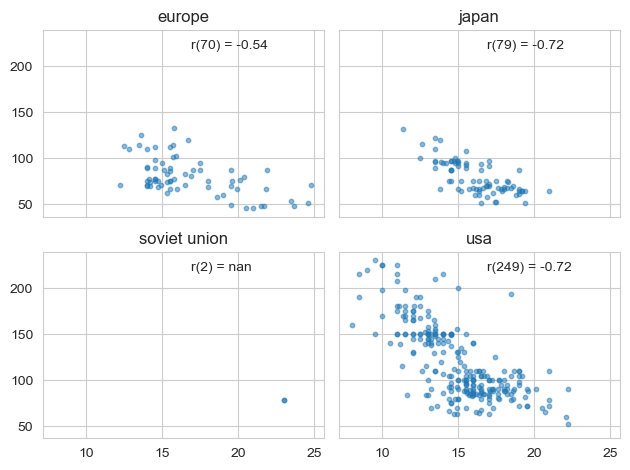

In [126]:
# First create the figure and axes
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True)

# Then plot each group in a separate axes
for (group_name, group_df), ax in zip(gb, axs.flat):
    # Extract the values and transpose (reshape) from (n, 2) to (2, n)
    x, y = group_df[['acceleration', 'horsepower']].values.T
    ax.scatter(x, y, s=10, alpha=0.5)
    ax.set_title(group_name)
    # For annotation, add the correlation coefficient
    corr = group_df[['acceleration', 'horsepower']].corr().min().iloc[0]
    n = group_df.shape[0]
    ax.annotate(f'r({n}) = {corr:.2f}',
        xy=(0.525, 0.9,), xycoords='axes fraction')

fig.tight_layout()
fig.show()

And offers more control compared with the built-in plotting in pandas, which is much more useful for simple exploration. See [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html).

(Text(0.525, 0.9, 'r(398) = -0.69'),)

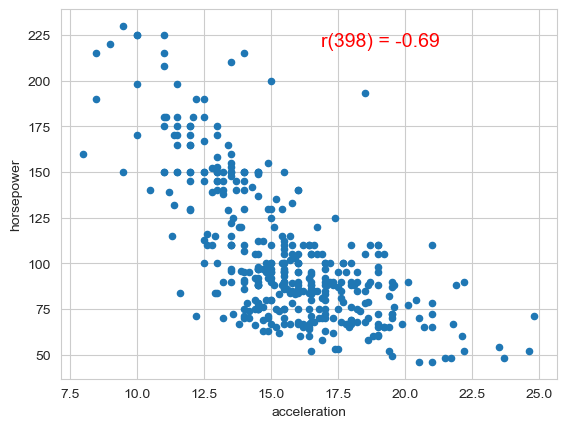

In [214]:
ax = mpg.plot.scatter('acceleration', 'horsepower', )

correlation_between_acceleration_and_horsepower = mpg[['acceleration', 'horsepower']].corr().min().iloc[0]

ax.annotate(f'r({mpg.shape[0]}) = ' +
        f"{correlation_between_acceleration_and_horsepower:.2f}",
        xy=(0.525, 0.9,), xycoords='axes fraction', fontsize=14, c='red'),

#### $\color{dodgerblue}{\text{Exercise}}$

Aggregate the mean and standard deviation of models from USA and Japan, by `origin` and `cylinders`.

In [140]:
grouped = mpg.loc[mpg['origin'].isin(['usa', 'japan'])].groupby(
    ['origin', 'cylinders'])[['mpg', 'horsepower']].agg(['mean', 'std']).round(2)

print(grouped.index.levels) # A two-level index
grouped.head()

[['japan', 'usa'], [3, 4, 6, 8]]


mpg       horsepower       
                   mean   std       mean    std
origin cylinders                               
japan  3          20.55  2.56      99.25   8.30
       4          31.60  5.44      75.58  13.98
       6          23.88  4.95     115.83  12.11
usa    4          27.84  4.55      80.96  10.54
       6          19.66  3.37      99.67  12.93

The result is a `MultiIndex`ed data frame. Here are the basics. See more [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html).

----

Simple indexing, returning a column.

In [141]:
grouped[('mpg', 'mean')]

origin  cylinders
japan   3            20.55
        4            31.60
        6            23.88
usa     4            27.84
        6            19.66
        8            14.96
Name: (mpg, mean), dtype: float64

The indexing with MultiIndex can get complex - here we select the mean of mpg for all cars from Japan, with 3 or 4 cylinders.

In [144]:
# First we specify the first level of the index, then the second, then the column.
# Origin query (First level) > Cylinders query (Second level) > Column query
grouped.loc[(('japan'), (3, 4)), ('mpg', 'mean')]

origin  cylinders
japan   3            20.55
        4            31.60
Name: (mpg, mean), dtype: float64

Note that the origin and cylinders columns are now missing from the dataframe, they were turned into row indices (so far we only seen integers). We have shown how we can use them in reindexing operation. But sometimes we would want to return them to the data frame (e.g., if we want to use them on further analysis). 

In [145]:
 # Note that this returns a new dataframe, we can also use `inplace` argument.
grouped.reset_index(level='origin')

origin    mpg       horsepower       
                   mean   std       mean    std
cylinders                                      
3          japan  20.55  2.56      99.25   8.30
4          japan  31.60  5.44      75.58  13.98
6          japan  23.88  4.95     115.83  12.11
4            usa  27.84  4.55      80.96  10.54
6            usa  19.66  3.37      99.67  12.93
8            usa  14.96  2.84     158.30  28.45

Or skip this in the first place.

In [149]:
mpg.groupby(['origin', 'cylinders'], as_index=False)

mpg       horsepower       
                         mean   std       mean    std
origin       cylinders                               
europe       4          28.41  6.44      78.31  18.22
             5          27.37  8.23      82.33  18.58
             6          20.10  7.07     113.50  25.57
japan        3          20.55  2.56      99.25   8.30
             4          31.60  5.44      75.58  13.98
             6          23.88  4.95     115.83  12.11
soviet union 4          10.00  0.00      78.00   0.00
usa          4          27.84  4.55      80.96  10.54
             6          19.66  3.37      99.67  12.93
             8          14.96  2.84     158.30  28.45

### Transform

Often we would want the aggregation operation to return a data structure that has the same dimensions as the original. For example, when we want to add summary statistics of each group or subject (e.g., think of an experiment with many trials per participant).

In [151]:
weight_by_origin_gb = mpg.groupby('origin')['weight'].mean()
weight_by_origin_transform = mpg.groupby(
        'origin', sort=False)['weight'].transform('mean') # You can also use a function, rather than string - like np.mean, or some custom function

print(weight_by_origin_gb.shape,
      weight_by_origin_transform.shape, sep='\n')

(4,)
(400,)


`assign` is a method that returns a new dataframe with an additional column.

In [152]:
mpg = mpg.assign(weight_by_origin=weight_by_origin_transform)

<Axes: ylabel='Frequency'>

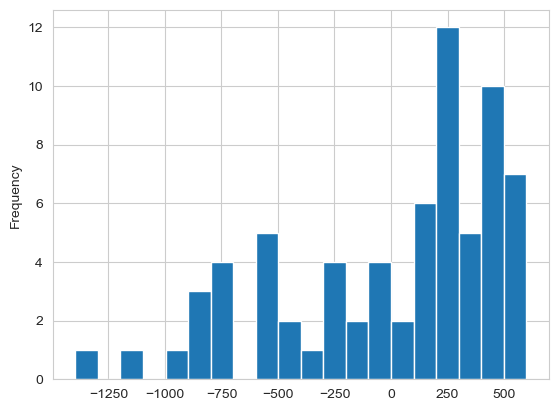

In [157]:
european_manufacturer = mpg.loc[mpg['origin'] == 'europe']
(european_manufacturer['weight_by_origin'] - european_manufacturer['weight']).plot(kind='hist', bins=20)

#### Missing values

Note that we have a couple of `NaN` (used for missing values) on `horsepower`.

In [158]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mpg               400 non-null    float64
 1   cylinders         400 non-null    int64  
 2   displacement      400 non-null    float64
 3   horsepower        394 non-null    float64
 4   weight            400 non-null    float64
 5   acceleration      400 non-null    float64
 6   model_year        400 non-null    int64  
 7   origin            400 non-null    object 
 8   name              400 non-null    object 
 9   kpg               400 non-null    float64
 10  weight_by_origin  400 non-null    float64
dtypes: float64(7), int64(2), object(2)
memory usage: 37.5+ KB


One way of imputation is to fill the missing values with some cetral tendency measure. We can do it with the mean or median, for example.



#### $\color{dodgerblue}{\text{Exercise}}$

Fill in the code below, returning the `horsepower` column where missing values will be filled with the dataset median for the column. 

In [161]:
mpg['horsepower'].fillna(mpg['horsepower'].agg('median')).isna().any()

False

If we want to fill the missing values in the column using the mean of a specific group, here is one option.

In [ ]:
mpg['horsepower'] = mpg['horsepower'].fillna(mpg.groupby('cylinders')['horsepower'].transform(
    'mean')).values
mpg.describe().round(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,kpg
count,398.00,399.00,399.00,399.00,399.00,399.00,399.00,398.00
mean,23.51,5.45,193.18,104.07,2969.33,15.59,80.77,37.83
std,7.82,1.70,104.25,38.29,846.06,2.78,95.24,12.58
min,9.00,3.00,68.00,46.00,1613.00,8.00,70.00,14.48
25%,17.50,4.00,102.50,76.00,2224.50,13.85,73.00,28.16
50%,23.00,4.00,146.00,92.00,2800.00,15.50,76.00,37.01
75%,29.00,8.00,262.00,125.00,3607.00,17.20,79.00,46.66
max,46.60,8.00,455.00,230.00,5140.00,24.80,1977.00,74.98


### I / O

So far we either created our dataframes by hand, or imported them from a built-in dataset. However, usually you would be working on files.

Now is a good time to tell you that Colab runs on a Linux-based machine. As with any computer, we have folders. 

We can use the exclamation mark to run commands on the shell ("Command prompt") of our current machine. In general learning to work with the shell is a very useful skill for anyone working with files and data.

Here is the current folder contents, and the contents of the `sample_data` folder that colab offers us.

If you are not on Google Colab right now but downloaded the project, run the following code:

In [172]:
import os
if not any(['COLAB' in k for k in os.environ.keys()]):
    os.chdir('..')

In [175]:
ls . # Reveals the files in the current folder

 Volume in drive G is eitan.hemed@gmail.com - Googl...
 Volume Serial Number is 1983-1116

 Directory of G:\My Drive\OneDrive Transfer\Postdoc\Projects\python-workshop


 Directory of G:\My Drive\OneDrive Transfer\Postdoc\Projects\python-workshop


 Directory of G:\My Drive\OneDrive Transfer\Postdoc\Projects\python-workshop


 Directory of G:\My Drive\OneDrive Transfer\Postdoc\Projects\python-workshop


 Directory of G:\My Drive\OneDrive Transfer\Postdoc\Projects\python-workshop


 Directory of G:\My Drive\OneDrive Transfer\Postdoc\Projects\python-workshop


 Directory of G:\My Drive\OneDrive Transfer\Postdoc\Projects\python-workshop


 Directory of G:\My Drive\OneDrive Transfer\Postdoc\Projects\python-workshop


 Directory of G:\My Drive\OneDrive Transfer\Postdoc\Projects\python-workshop

07/07/2023  11:41 AM    <DIR>          .
07/03/2023  10:53 AM    <DIR>          ..
07/03/2023  02:35 PM                 6 .gitignore
07/07/2023  11:41 AM    <DIR>          .idea
07/03/2023  12:41 PM 

In [182]:
ls "./sample_data" # Reveals the files in the sample_data folder

 Volume in drive G is eitan.hemed@gmail.com - Googl...
 Volume Serial Number is 1983-1116

 Directory of G:\My Drive\OneDrive Transfer\Postdoc\Projects\python-workshop\sample_data

07/07/2023  11:42 AM    <DIR>          .
07/07/2023  11:41 AM    <DIR>          ..
07/07/2023  11:35 AM           301,141 california_housing_test.csv
07/07/2023  11:36 AM         1,706,430 california_housing_train.csv
               2 File(s)      2,007,571 bytes

 Directory of G:\My Drive\OneDrive Transfer\Postdoc\Projects\python-workshop


 Directory of G:\My Drive\OneDrive Transfer\Postdoc\Projects\python-workshop


 Directory of G:\My Drive\OneDrive Transfer\Postdoc\Projects\python-workshop


 Directory of G:\My Drive\OneDrive Transfer\Postdoc\Projects\python-workshop


 Directory of G:\My Drive\OneDrive Transfer\Postdoc\Projects\python-workshop


 Directory of G:\My Drive\OneDrive Transfer\Postdoc\Projects\python-workshop


 Directory of G:\My Drive\OneDrive Transfer\Postdoc\Projects\python-workshop\sam

File Not Found
File Not Found


We see that Colab offers us two famous datasets "mnist" and "california housing" (if you are not on Colab, you will only see the housing dataset). The files are split into training and testing datasets, so we can easily train a machine learning model to the training set and test on the test set.

We will use these files to demonstrate how we read and write data to and from files.

#### $\color{dodgerblue}{\text{Exercise}}$

Fill in the code below to load the california datasets. 

In [185]:
housing_train = pd.read_csv('sample_data/california_housing_train.csv')
housing_test = pd.read_csv('sample_data/california_housing_test.csv')

print(housing_train.shape, housing_test.shape, sep='\n')

(17000, 9)
(3000, 9)


Here we combine the two files, by concatenating the two dataframes. 

In [186]:
housing_combined = pd.concat(
    [housing_train, housing_test]
)
print(housing_combined.shape)
## Another option would be 
# df = train.append(test)

(20000, 9)


#### $\color{dodgerblue}{\text{Exercise}}$

Fill in the code below to save the new dataframe into a CSV file named 'california_combined', place it in the same directory as the original files. 

In [187]:
housing_combined.to_csv('sample_data/california_combined.csv', index=False)

Now let's see if we saved it correctly. 

In case you are not using Colab, Jupyter Notebook or a similar tool, you might want to use the some module to view files and folders on disk from within Python. One out of many options here would be:

In [193]:
import glob
glob.glob('sample_data/*')

['sample_data\\california_housing_test.csv',
 'sample_data\\california_housing_train.csv',
 'sample_data\\california_combined.csv']

glob is very useful, and can be used for complex

In [194]:
glob.glob('sample_data/*_combined.csv')

['sample_data\\california_combined.csv']

Pandas can work with many [other formats](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html) except CSV, like Excel, SPSS, Stata, and more. The process is pretty much the same as we did here.

If you want to know more about working with Colab, for example - how to connect your Google Drive to Colab and analyze your own files, see [here](https://colab.research.google.com/notebooks/io.ipynb).

### Misc.



Often times we want to view the individual values in a specific column or the whole dataframe. `unique` and `value_counts` are useful here. 

In [197]:
print(mpg['name'].value_counts().head(10),
      mpg['name'].unique()[:10], sep='\n\n')

name
ford pinto            6
ford maverick         5
toyota corolla        5
amc matador           5
toyota corona         4
chevrolet impala      4
amc gremlin           4
chevrolet chevette    4
peugeot 504           4
amc hornet            4
Name: count, dtype: int64

['chevrolet chevelle malibu' 'buick skylark 320' 'plymouth satellite'
 'amc rebel sst' 'ford torino' 'ford galaxie 500' 'chevrolet impala'
 'plymouth fury iii' 'pontiac catalina' 'amc ambassador dpl']


Note that to do the same for a dataframe rather than a series, we will need to use the `apply` method, that iterates over the columns (or rows).

In [199]:
## Iterating over columns, the default behavior, is equivalent to looping over each column and applying the function to it
mpg[['cylinders', 'origin']].apply(lambda s: s.unique())

cylinders                       [8, 4, 6, 3, 5]
origin       [usa, japan, europe, soviet union]
dtype: object



#### Dataframe.query


`query` is a row-selection method of pandas dataframes that can be very elegant, especially after long chaining operations.

Say we want to take all models weighting more than 2000 which were in made USA. Then we want to aggregate the groups by number of cylinders, and select only those who make less than 25 miles per gallon.

Consider the two following options:

In [213]:
# This is succint, readable and easy to debug
mpg.query('weight > 2000 & origin == "usa"'
    ).select_dtypes('number').groupby('cylinders').median().query('mpg < 25')


,mpg,displacement,horsepower,weight,acceleration,model_year,kpg,weight_by_origin
cylinders,,,,,,,,
6,19.0,231.0,100.0,3239.0,16.45,1975.0,30.571,3361.931727
8,14.0,350.0,150.0,4140.0,13.00,1973.0,22.526,3361.931727


#### where and mask

`where` is another method, which returns a copy of the dataframe, setting to `NaN` every row or cell that is not True according to the filter expression. This is useful if you want to filter rows or columns but get an object which has the same dimensions. 

In [215]:
mpg.where(mpg['name'] == 'buick skylark 320').head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,kpg,weight_by_origin
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,15.0,8.0,350.0,165.0,3693.0,11.5,1970.0,usa,buick skylark 320,24.135,3361.931727
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The inverse of `where` is mask.

In [223]:
mpg.mask(mpg['name'] == 'buick skylark 320').head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,kpg,weight_by_origin
0,18.0,8.0,307.0,130.0,3504.0,12.0,1970.0,usa,chevrolet chevelle malibu,28.962,3361.931727
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,18.0,8.0,318.0,150.0,3436.0,11.0,1970.0,usa,plymouth satellite,28.962,3361.931727
3,16.0,8.0,304.0,150.0,3433.0,12.0,1970.0,usa,amc rebel sst,25.744,3361.931727
4,17.0,8.0,302.0,140.0,3449.0,10.5,1970.0,usa,ford torino,27.353,3361.931727


### Reshaping

Reshaping is the act of changing the structure of a dataframe, like turning rows into columns and vice versa (e.g., "Pivot table"). 

As with any task, Pandas offers a variety of reshaping options. Here are the basics.

In [224]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [225]:
pivotted = pd.pivot_table(tips, 
               values=['total_bill', 'tip'], index=['smoker', 'time'], 
               columns='size',
               aggfunc='sum') # Can also be median, your own function, etc.

pivotted

tip                                    total_bill          \
size              1       2      3      4      5     6          1       2   
smoker time                                                                 
Yes    Lunch   1.92   47.04   7.23   9.00   0.00   0.0       8.58  292.78   
       Dinner  1.00  131.79  41.91  34.92   5.00   0.0       3.07  892.30   
No     Lunch   1.83   78.96   6.54  12.09   5.00  15.9      10.07  481.33   
       Dinner  1.00  145.05  73.26  97.00  10.14   5.0       7.25  899.48   

                                             
size                3       4      5      6  
smoker time                                  
Yes    Lunch    35.18   63.64   0.00   0.00  
       Dinner  303.12  273.06  58.61   0.00  
No     Lunch    57.44   86.11  41.19  91.15  
       Dinner  488.81  635.89  50.54  48.17

Reshaping wide dataframe to long can be achieved usign stack.

In [227]:
tips.groupby(['smoker'])[['total_bill', 'tip']].mean().stack().reset_index().rename(
    columns={'level_1': 'Variable', 0: 'Mean Value'}
)

,smoker,Variable,Mean Value
0,Yes,total_bill,20.756344
1,Yes,tip,3.008710
2,No,total_bill,19.188278
3,No,tip,2.991854


Crosstabbing is another common operation. 

In [ ]:
pd.crosstab(tips['smoker'], tips['time'])

time,Lunch,Dinner
smoker,,
Yes,23,70
No,45,106


That's it for pandas, we merely scratched the surface. We didn't cover some very powerful features like windowed operations (e.g., cumulative\rolling sum), time series and categorical data. To continue on your own, head over [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/index.html).

And finally, there are alternatives to Pandas. One particularly interesting one is Polars, which offers different approach to dataframes, which can result in much higher speed and ability to work with very large datasets, compared with Pandas. See [here](https://www.pola.rs/).

# Seaborn

Seaborn is a visualiztion library (like Matplotlib), but is built on top of Matplotlib. 

In [228]:
import seaborn as sns
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Seaborn offers many types of plots. Most can be drawn straight onto your subplots object and using variables taken straight from a data frame. 

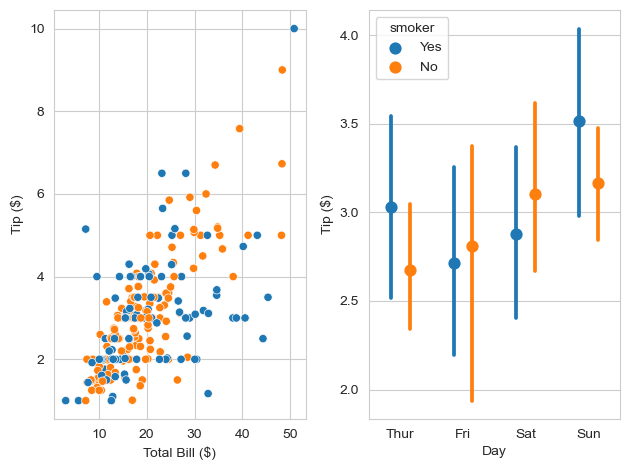

In [230]:
fig, axs = plt.subplots(1, 2)

ax1 = sns.scatterplot(
    data=tips, x='total_bill', y='tip', hue='smoker', 
    ax=axs[0],
    legend=None,
)

ax1.set(xlabel='Total Bill ($)', ylabel='Tip ($)')

ax2 = sns.pointplot(
    data=tips, x='day', y='tip', hue='smoker',
    ax=axs[1],
    join=False, dodge=0.3
)

ax2.set(xlabel='Day', ylabel='Tip ($)')

fig.tight_layout()

#### $\color{dodgerblue}{\text{Exercise}}$

Generate a figure with subplots in a 3X1 array.
Using the `tips` dataset, draw the following from topmost to bottommost.

* A horizontal boxplot (`sns.boxplot`) of the number of guests in a party (`size`) on each day. Seperate the boxes into different hues based on the sex of the person paying the waiter.  
* A histogram (`sns.histplot`) of the relative size of `tip` to `total_bill`, with the color of the hisograms based on the whether there is a `smoker` in the party. 
* A line (`sns.lineplot`) showing the trend in `total_bill`' across the values of `size`. Set the style of the lines to whether there is a smoker in the party. 

<Axes: xlabel='size', ylabel='tip'>

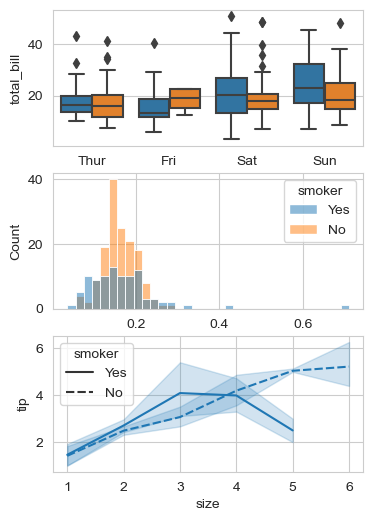

In [231]:
fig, axs = plt.subplots(3, 1, figsize=(4, 6))

sns.boxplot(ax=axs.flat[0], data=tips, x='day', y='total_bill', hue='smoker')
axs.flat[0].legend().remove()

sns.histplot(ax=axs.flat[1], data=tips, x=tips['tip'] / tips['total_bill'], 
             hue='smoker', alpha=0.5)

sns.lineplot(data=tips, ax=axs.flat[2], x='size', y='tip', 
             style='smoker')

The plots we used so far are axes-level plots. They can either accept an `ax` argument or return a new ax if not given one be to plotted on. 



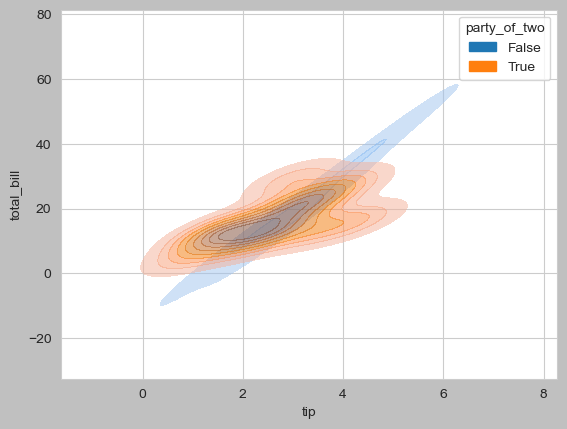

In [268]:
tips['party_of_two'] = tips['size'] == 2

ax = sns.kdeplot(data=tips.query("day == 'Fri'"), x='tip', y='total_bill',
                 hue='party_of_two', fill=True, alpha=0.5)

# If we want a handle to the Figure object that Seaborn did not give us
fig = ax.get_figure()
fig.set_facecolor('silver')



Seaborn also can generate figure level plots. 

They do not accept an `ax` argument, and are drawn into their own object, usually one that inherits properties from the Matplotlib Figure class.

[[<Axes: ylabel='total_bill'> <Axes: xlabel='tip', ylabel='total_bill'>]
 [<Axes: xlabel='total_bill', ylabel='tip'> <Axes: xlabel='tip'>]]


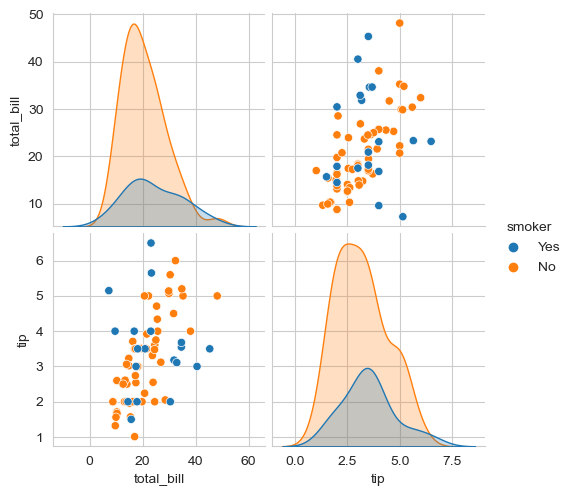

In [275]:
pairplot_grid = sns.pairplot(tips.loc[tips['day'].isin(['Thu', 'Sun']), ['total_bill', 'tip', 'smoker']], hue="smoker", )
print(pairplot_grid.axes) # Just like a Figure

Another illustrative multi-grid plot. 

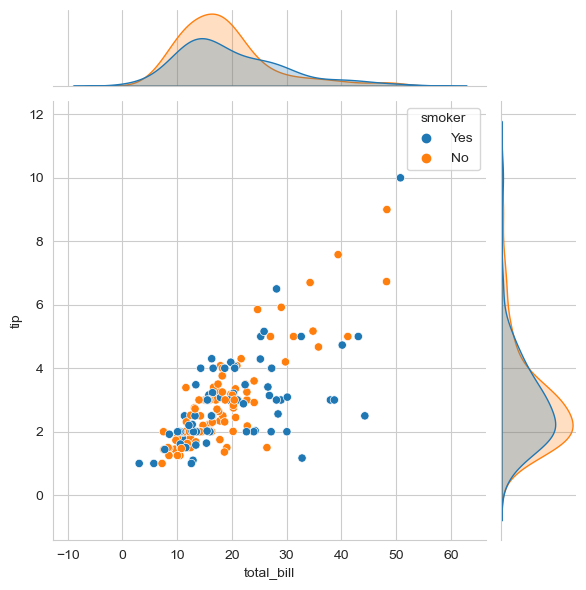

In [299]:
marginal_hist = sns.jointplot(data=tips.query('day != "Sun"'), x='total_bill',
                              y='tip', hue='smoker',)

<Axes: >

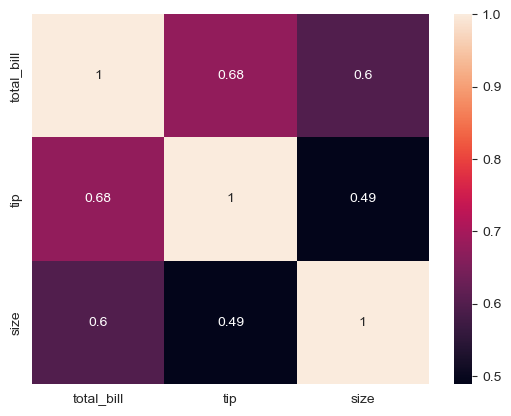

In [300]:
sns.heatmap(tips.select_dtypes('number').corr(), annot=True)

To sum up, most multi grid plots are very useful for exploration of data. 

One last thing to learn about Seaborn is it's `FacetGrid` object. While offering slightly less control than directly using subplots and looping over groups from a GroupBy operation, it can produce nice graphs quickly. See more [here](https://seaborn.pydata.org/tutorial/axis_grids.html#grid-tutorial).

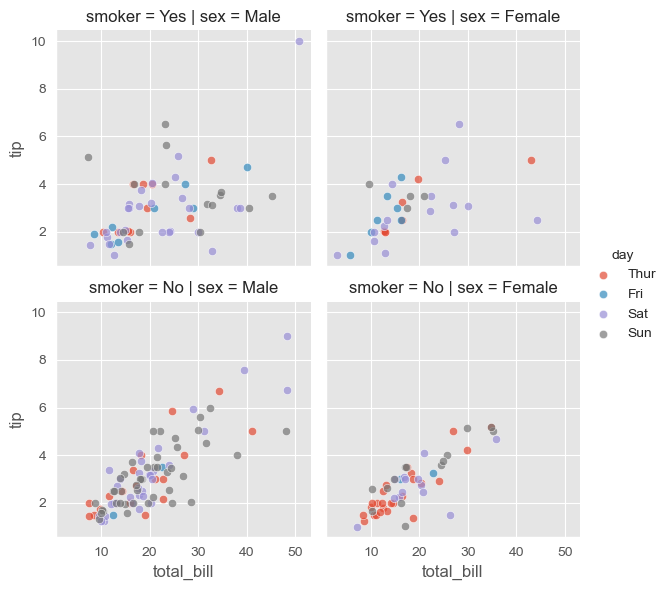

In [301]:
from matplotlib import pyplot as plt
plt.style.use('ggplot') # Set a nice scheme

g = sns.FacetGrid(tips, col="sex", row="smoker", hue='day')
g.map(sns.scatterplot, "total_bill", "tip", alpha=.7)
g.add_legend()

# Installing new libraries

Before we get to the next section, we need to learn how to install new libraries. Up until now we've used libraries that are either built-in or are already installed in Colab.

To install a new library, we use the `pip` command. `pip` is a common package manager in Python. It is used to install, update, and remove packages published on the Python Package Index (PyPI), or shared through other means.

Personally, I prefer to use `conda` to manage my packages, as I find it easier to manage environments .

# Pingouin


There are several libraries in Python that make common statistical tests accessible. We will look mainly at `Pingouin`, as it is highly accessible and includes many tests used frequently in the social sciences.

In [20]:
# First, to get a list of the installed packages
! pip list

Package                       Version
----------------------------- -----------
anyio                         3.7.0
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
asttokens                     2.2.1
attrs                         23.1.0
backcall                      0.2.0
backports.functools-lru-cache 1.6.5
beautifulsoup4                4.12.2
bleach                        6.0.0
Brotli                        1.0.9
certifi                       2023.5.7
cffi                          1.15.1
charset-normalizer            3.1.0
colorama                      0.4.6
comm                          0.1.3
contourpy                     1.1.0
cycler                        0.11.0
debugpy                       1.6.7
decorator                     5.1.1
defusedxml                    0.7.1
entrypoints                   0.4
exceptiongroup                1.1.1
executing                     1.2.0
fastjsonschema                2.17.1
flit_core                     3.9.0
fonttools   

As you can see, we have many libraries, but not `pingouin`. Let's install it.

In [21]:
! pip install pingouin

## Using Pingouin

Pingouin offers many statistical tests, implemented as functions. These functions receive usually a dataframe, and some other arguments ("dependent", "indepenent", etc.). They return the resutls in a dataframe form.

#### $\color{dodgerblue}{\text{Exercise}}$

Import `Pingouin` and load the `attention` dataset from `Seaborn`.
conduct a repeated-measures ANOVa using Pingouin, with the following parameters:

* `subject` is the participant ID.
* `attention` is the between group factor.
* `solutions` is the within group (repeated) factor.
* `score` is the dependent variable.

In [314]:
import pingouin as pg
import seaborn as sns
df = sns.load_dataset('attention')

In [315]:
pg.mixed_anova(
    data=df,
    dv='score',
    between='attention',
    within='solutions',
    subject='subject',
    correction=False,
    effsize="np2")

,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,attention,42.504167,1,18,42.504167,17.598045,0.000544,0.494354,NaN
1,solutions,14.408333,2,36,7.204167,6.590851,0.003639,0.268020,0.721947
2,Interaction,15.408333,2,36,7.704167,7.048285,0.002612,0.281388,NaN


We will use the Penguins dataset from the Seaborn library, and conduct several tests on it.

#### Independent Samples t-test


Here we will test a simple hypothesis about the penguin dataset. As you can see, the `bill_length_mm` attribute is different between the three species.

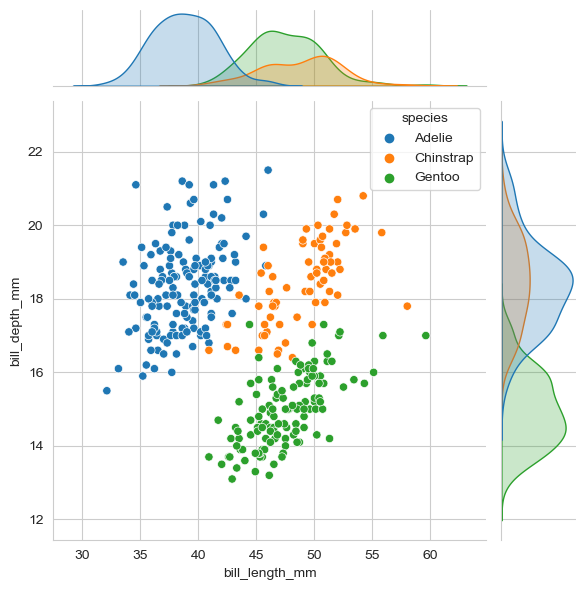

In [22]:
penguins = sns.load_dataset('penguins')

sns.jointplot(data=penguins, x='bill_length_mm',
                              y='bill_depth_mm',
                              hue="species")

#### $\color{dodgerblue}{\text{Exercise}}$

Statsmodels t-test function receives two arrays x1 and x2, and some other argumensts. 

Use the Penguin data set to test the hypothesis that the bill length of the `Adelie` species is smaller than that of the `Chinstrap` group.

Sample 8 observations from each group. 

Print out the results using `str.format` method or an f-string. If the p-value is less than 0.001, print it as "< .001".

In [306]:
# Some imports for the following examples
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from statsmodels.stats.weightstats import ttest_ind
from statsmodels.formula.api import ols

penguins = sns.load_dataset('penguins')
n = 8
dependent_var = 'bill_length_mm'

adelie_data = penguins.query('species == "Adelie"').sample(
    n=n, random_state=42)[dependent_var]
chinstrap_data = penguins.query('species == "Chinstrap"').sample(
    n=n, random_state=42)[dependent_var]

t, p_value, dof = ttest_ind(adelie_data, chinstrap_data, alternative='smaller')
p_value_clause = '< .001' if p_value < .001 else f'= {p_value:.3f}'
print(f't({dof}) = {t:.2f}, p-value {p_value_clause}')

t(14.0) = -8.38, p-value < .001



## robusta

Self-promotion time!

**[robusta](https://eitanhemed.github.io/robusta/_build/html/index.html)** is a statistical hypothesis testing in Python that I developed.  It is still a work in progress, but can be used for most common statistical analysis used in the social sciences. This package is based on [rpy2](https://rpy2.github.io/), an API allowing use R, within Python.

**[robusta](https://eitanhemed.github.io/robusta/_build/html/index.html)** currently offers Bayesian and frequentist tests which are not available in other Python packages.

Here is a [demo](https://colab.research.google.com/drive/1jmwYpEGcpFr4CF6ZA5HMiQ2LcHbZqzO_?usp=sharing) of the current state.



# AI-assisted coding

In the past two years or so, AI assisted coding tools were made available to the public, as free or paid services. These tools are based on machine learning models that were trained on large datasets of text and specifically - code. These tools can provide in-notebook or in-IDE code completion, code generation, and more.

Personally, I find these tools very useful, and use them frequently. However, they are not perfect, and sometimes can be misleading and suggest using code-libraries which do not exist, or are not relevant to the task at hand. Having said that, they are getting increasingly better.

Using these tools can be helpful especially if you are dealing with a lot of 'boilerplate' code - when you want to perform some task (e.g., filter outliers based on standard scores) which is not very novel.

Personally